# TITANIC 

## Description:
This notebook aims to perform data analysis on the Titanic dataset. The dataset contains information about the passengers onboard the ill-fated Titanic ship, which sank in 1912. Through this analysis, we can gain insights into the passengers' characteristics and identify factors that influenced their survival rates.

### Objective:
1. Explore and Understand the Titanic Dataset: This notebook will delve into the Titanic dataset, examining its variables, descriptive statistics, and passenger characteristics to gain a deeper understanding of the data.
2. Exploratory Analysis: We will conduct exploratory analysis on the Titanic dataset to better comprehend the passengers' profiles. This includes data visualization, pattern mapping, and discovering intriguing insights about the Titanic passengers.
3. Build a Prediction Model: Using the Random Forest Classifier algorithm, we will construct a prediction model that can predict whether a passenger survived or not based on the available features.
4. Model Evaluation and Conclusion: Finally, we will evaluate the performance of the prediction model and summarize the findings from the data analysis.
 
#### With this more engaging description and objective, your notebook will become more captivating and informative for readers. Make sure to populate your notebook with relevant and compelling analyses to achieve the established objectives.

## Importing Libraries and Dataset

### Importing necessary libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load dataset

In [93]:
train_data = pd.read_csv('/kaggle/input/d/rahulsah06/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/d/rahulsah06/titanic/test.csv')

### Reading train dataset

In [94]:
train_data.head()   #display the first rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Reading test dataset

In [97]:
test_data.head()  #display the first rows of dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Cleansing

### Checking missing or null values in dataset

In [100]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Data processing

In [102]:
def preprocess_data(data):
    #Fill in the missing values ​​in the 'Age' column with the average age
    data['Age'].fillna(
        data['Age'].mean(),
        inplace=True
    )
    
    #Fill in the missing values ​​in the 'Fare' column with the average fare
    data['Fare'].fillna(
        data['Fare'].mean(),
        inplace=True
    )
    
    #Changes the categorical value in the 'Sex' column to a number (0 for female, 1 for male)
    data['Sex'] = data['Sex'].map(
        {
            'female' : 0,
            'male' : 1
        }
    ).astype(int)
    
    #Changes the categorical value in the 'Embarked' column to a number (0 for S, 1 for C, 2 for Q)
    data['Embarked'] = data['Embarked'].map(
        {
            'S': 0,
            'C': 1,
            'Q': 2
        }
    ).fillna(0).astype(int)
    
    #Remove irrelevant columns
    data.drop(
        [
            'PassengerId',
            'Name',
            'Ticket',
            'Cabin'
        ], axis=1, inplace=True
    )
    
    return data

## Data visualization

### Histplot

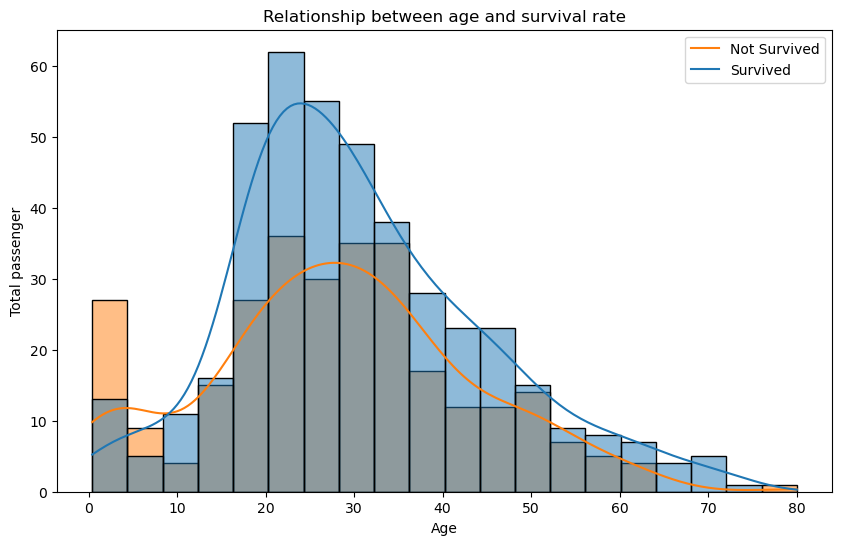

In [103]:
plt.figure(figsize=(10,6))
sns.histplot(
    data = train_data,
    x = 'Age',
    hue = 'Survived',
    kde = True
)
plt.title('Relationship between age and survival rate')
plt.xlabel('Age')
plt.ylabel('Total passenger')
plt.legend(
    ['Not Survived',
     'Survived'
    ]
)
plt.show()

### Barplot

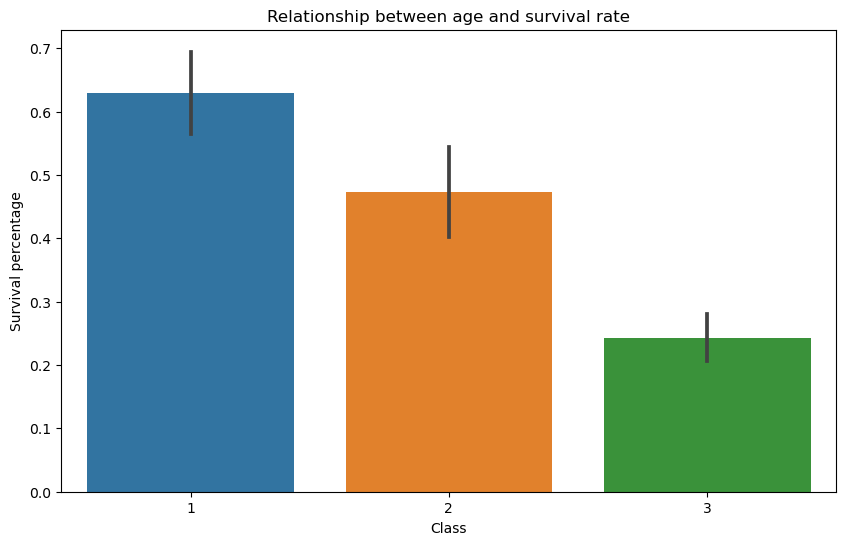

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = train_data,
    x = 'Pclass',
    y = 'Survived'
)
plt.title('Relationship between age and survival rate')
plt.xlabel('Class')
plt.ylabel('Survival percentage')
plt.show()

## Processing train and Test data

In [105]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

### Separating features and targets on train dataset

In [106]:
X = train_data.drop(
    'Survived',
    axis=1
)

y = train_data['Survived']

### Dividing training data into training data and validation data

In [107]:
X_train, X_val, y_train, y_val = train_test_split (
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

### Build a Random Forest model

In [108]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

### Train model

In [109]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict validation data

In [110]:
y_pred = model.predict(X_val)

### Calculates model accuracy

In [111]:
accuracy = accuracy_score(y_val, y_pred)

print('Model Accuracy : ', accuracy)

Model Accuracy :  0.8156424581005587


### Predict test data

In [112]:
test_pred = model.predict(test_data)

### Save predictions to a CSV file

In [113]:
submission = pd.DataFrame({'PassengerId': test_data.index, 'Survived': test_pred})
submission.to_csv('submission.csv', index=False)